## Entrenamiento del modelo

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [12]:
# --- Cargar los datos ---
X = np.load(r"C:\Users\Lenovo\Documents\Diplomado_ML\Hackaton\Reescalamiento\X_cubos2.npy")
y = np.load(r"C:\Users\Lenovo\Documents\Diplomado_ML\Hackaton\Reescalamiento\y_etiquetas2.npy")

In [14]:
# Eliminar la banda 2 (índice 1)
X_filtered = np.delete(X, 1, axis=-1)

In [16]:
# Normalización banda a banda
x_norm = np.empty_like(X_filtered, dtype=np.float32)
for b in range(X_filtered.shape[-1]):
    band = X_filtered[:, :, :, b]
    min_val = band.min()
    max_val = band.max()
    x_norm[:, :, :, b] = (band - min_val) / (max_val - min_val + 1e-8)

In [18]:
# División en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(x_norm, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
# --- Definición del modelo CNN mejorado ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(13, 13, 7)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.35),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Aumentado para regularización
    Dense(1, activation='sigmoid')
])

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 32)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,937 (437.25 KB)

 Trainable params: 111,489 (435.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [71]:
# --- Compilación ---
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
# --- Callbacks ---
early_stop = EarlyStopping(patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1, min_lr=1e-6)

# --- Entrenamiento ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.5264 - loss: 1.2307 - val_accuracy: 0.6257 - val_loss: 0.6816 - learning_rate: 0.0010
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6111 - loss: 0.8745 - val_accuracy: 0.5263 - val_loss: 0.6891 - learning_rate: 0.0010
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6614 - loss: 0.7792 - val_accuracy: 0.5263 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6302 - loss: 0.7295 - val_accuracy: 0.5263 - val_loss: 0.8083 - learning_rate: 0.0010
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6084 - loss: 0.7255 - val_accuracy: 0.5263 - val_loss: 0.8829 - learning_rate: 0.0010
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6672 - loss: 0.6223 - val_accuracy: 0.5263 - val_loss: 0.9351 - learning_rate: 0.0010
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6999 - loss: 0.5838 -

In [75]:
# Evaluación
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"\n🔎 Accuracy de validación: {val_acc:.4f} | Loss: {val_loss:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7796 - loss: 0.5407

🔎 Accuracy de validación: 0.7602 | Loss: 0.5592


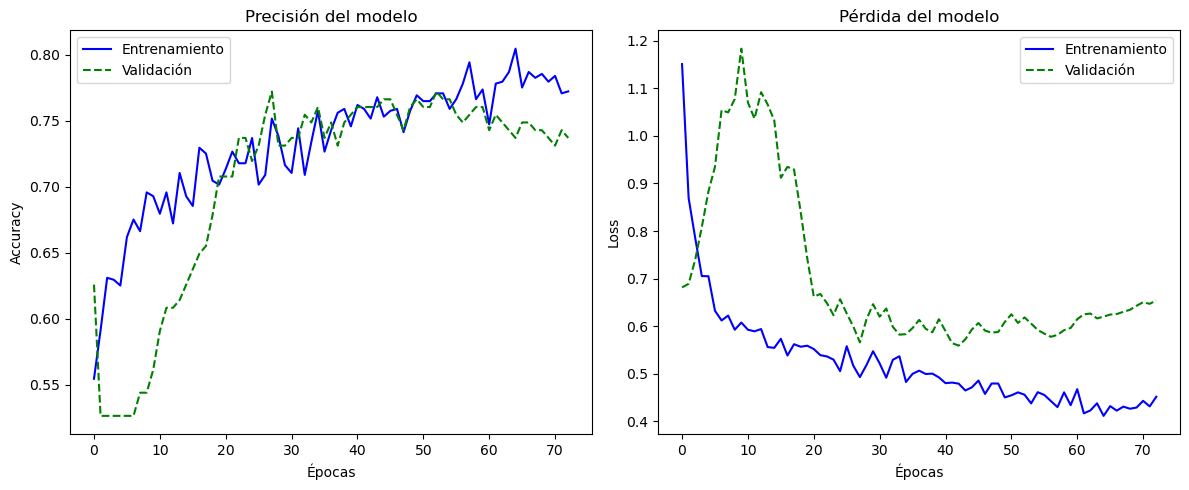

In [77]:
# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento', color='blue')
plt.plot(history.history['val_accuracy'], label='Validación', color='green', linestyle='--')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Validación', color='green', linestyle='--')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [79]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Predecir probabilidades y convertir a clases binarias
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# 2. Generar el classification report
print(classification_report(y_val, y_pred, target_names=["No Deslizamiento", "Deslizamiento"]))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
                  precision    recall  f1-score   support

No Deslizamiento       0.79      0.68      0.73        81
   Deslizamiento       0.74      0.83      0.79        90

        accuracy                           0.76       171
       macro avg       0.76      0.76      0.76       171
    weighted avg       0.76      0.76      0.76       171



In [81]:
# Guardar el modelo en formato HDF5 (.h5)
model.save("modelo_deslizamientos.h5")

print("✅ Modelo guardado exitosamente como 'modelo_deslizamientos.h5'")

✅ Modelo guardado exitosamente como 'modelo_deslizamientos.h5'


## Implementación del modelo

In [86]:
import numpy as np
import rasterio
from tensorflow.keras.models import load_model
from tqdm import tqdm
import matplotlib.pyplot as plt
import folium
from matplotlib import colors

In [88]:
# === CONFIGURACIÓN ===
tif_path = "stack_landslide_def.tif"
model_path = "modelo_deslizamientos.h5"
output_tif = "mapa_susceptibilidad_CNN.tif"

In [90]:
# === CARGAR MODELO ===
model = load_model(model_path)

In [92]:
# === LEER STACK .TIF ===
with rasterio.open(tif_path) as src:
    profile = src.profile
    data = src.read().astype(np.float32)
    transform = src.transform
    crs = src.crs
    bounds = src.bounds
    height, width = data.shape[1:]

In [94]:
# === ELIMINAR BANDA 2 ===
data = np.delete(data, 1, axis=0)

# === NORMALIZAR CADA BANDA ===
data_norm = np.empty_like(data)
for b in range(data.shape[0]):
    min_val, max_val = np.nanmin(data[b]), np.nanmax(data[b])
    data_norm[b] = (data[b] - min_val) / (max_val - min_val + 1e-8)

In [96]:
# === APLICAR PADDING ===
pad = 6
data_pad = np.pad(data_norm, ((0, 0), (pad, pad), (pad, pad)), mode='reflect')

In [103]:
patches = []
coords = []

for i in range(pad, height + pad):
    for j in range(pad, width + pad):
        patch = data_pad[:, i-pad:i+pad+1, j-pad:j+pad+1]
        patches.append(np.transpose(patch, (1, 2, 0)))
        coords.append((i-pad, j-pad))

patches = np.array(patches)
preds = model.predict(patches, batch_size=512, verbose=1)

# Reconstruir pred_map
for idx, (i, j) in enumerate(coords):
    pred_map[i, j] = preds[idx]

MemoryError: Unable to allocate 91.5 GiB for an array with shape (20770124, 13, 13, 7) and data type float32

In [ ]:
# === GUARDAR .TIF DE SALIDA ===
profile.update(dtype="float32", count=1, compress='lzw')
with rasterio.open(output_tif, "w", **profile) as dst:
    dst.write(pred_map, 1)
print(f"✅ Mapa guardado en: {output_tif}")

## Visualizacion

In [ ]:
# === VISUALIZACIÓN EN FOLIUM ===
import branca.colormap as bcm
from rasterio.plot import reshape_as_image
import matplotlib.cm as cm

In [ ]:
m = folium.Map(location=[(bounds.top + bounds.bottom)/2, (bounds.left + bounds.right)/2], zoom_start=10)

In [ ]:
# Generar imagen PNG para overlay (normalizada 0-1)
pred_norm = (pred_map - np.nanmin(pred_map)) / (np.nanmax(pred_map) - np.nanmin(pred_map))
plt.imsave("susceptibilidad_overlay.png", pred_norm, cmap="RdYlGn_r")

In [ ]:
# Superponer imagen
ImageOverlay(
    name='Susceptibilidad',
    image="susceptibilidad_overlay.png",
    bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
    opacity=0.6
).add_to(m)

In [ ]:
# Añadir leyenda
colormap = bcm.LinearColormap(['green', 'yellow', 'red'], vmin=0, vmax=1, caption='Susceptibilidad a deslizamientos')
colormap.add_to(m)

In [ ]:
folium.LayerControl().add_to(m)
m.save("mapa_interactivo.html")
print("🌍 Mapa interactivo guardado como 'mapa_interactivo.html'")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20320\2516380937.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20320\2516380937.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("metricas_modelo_cnn_mejoradas2.png", dpi=300)
C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


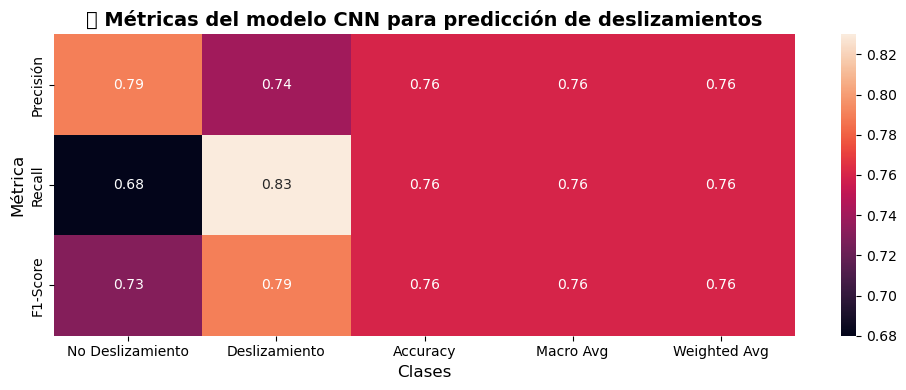

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos del classification report
data = {
    "Métrica": ["Precisión", "Recall", "F1-Score"],
    "No Deslizamiento": [0.79, 0.68, 0.73],
    "Deslizamiento": [0.74, 0.83, 0.79],
    "Accuracy": [0.76, 0.76, 0.76],
    "Macro Avg": [0.76, 0.76, 0.76],
    "Weighted Avg": [0.76, 0.76, 0.76],
}

df = pd.DataFrame(data)
df.set_index("Métrica", inplace=True)

# Crear mapa de calor
plt.figure(figsize=(10, 4))
sns.heatmap(df, annot=True, fmt=".2f", cbar=True)

# Títulos
plt.title("📊 Métricas del modelo CNN para predicción de deslizamientos", fontsize=14, weight='bold')
plt.ylabel("Métrica", fontsize=12)
plt.xlabel("Clases", fontsize=12)

# Guardar imagen
plt.tight_layout()
plt.savefig("metricas_modelo_cnn_mejoradas2.png", dpi=300)
plt.show()

In [34]:
plt.savefig("metricas_modelo_cnn_mejoradas.png", dpi=300)

<Figure size 640x480 with 0 Axes>

## Subir a github

In [33]:
import os
print("📁 Ruta actual:", os.getcwd())
print("📂 Contenido:", os.listdir())

📁 Ruta actual: C:\Users\lenovo\Documents\Diplomado_ML\Hackaton\Reescalamiento\mlds_6\scripts
📂 Contenido: ['data_acquisition', 'eda', 'evaluation', 'preprocessing', 'training']


In [35]:
if "mlds_6" not in os.getcwd():
    os.chdir("mlds_6")
    print("✅ Cambiado a carpeta mlds_6")

In [37]:
!move Modelamiento.ipynb scripts/training/

El sistema no puede encontrar el archivo especificado.
